**Table of contents**<a id='toc0_'></a>    
- 1. [Plot synchronization stack  ](#toc1_)    
- 2. [Load results from synchronization analysis ](#toc2_)    
- 3. [Aggregate figure](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>Plot synchronization stack   [&#128285;](#toc0_)

In [3]:
# Imports
import pickle

import numpy as np
import matplotlib.pyplot as plt

# 2. <a id='toc2_'></a>Load results from synchronization analysis  [&#128285;](#toc0_)

In [14]:
# Parameters
mag_min = 2.  # the minimum magnitude of the considered earthquakes
dx = 10.  # in km, the along-strike bin size to compute the correlation length, the average number of felt earthquakes...
cc_thr = 0.07  # the correlation coefficient threshold to measure the correlation length

In [15]:
# Load Cascadia
filename = "casc_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

cascadia = pickle.load(open(path, "rb"))

casc_eq = cascadia['n_close_eq']
casc_cc_d = cascadia['corr_length']

Loading results/casc_synch_mc2.0_dx10_cc0.07.pkl


In [16]:
# Load Nankai
filename = "nank_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

nankai = pickle.load(open(path, "rb"))

nank_eq = nankai['n_close_eq']
nank_cc_d = nankai['corr_length']

Loading results/nank_synch_mc2.0_dx10_cc0.07.pkl


# 3. <a id='toc3_'></a>Aggregate figure [&#128285;](#toc0_)

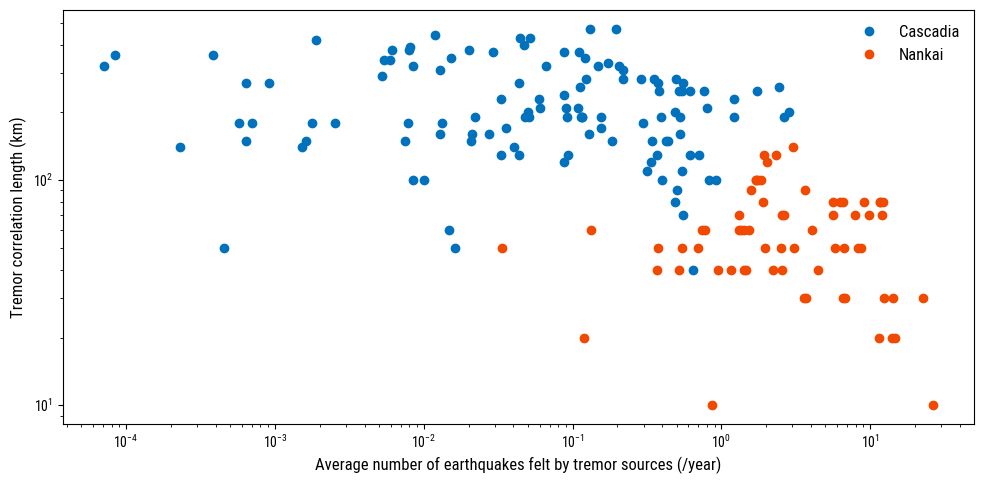

In [19]:
# Plot
dist_to_trm = 20

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel('Average number of earthquakes felt by tremor sources (/year)')
ax.set_ylabel('Tremor correlation length (km)')

ax.loglog(casc_eq[dist_to_trm], casc_cc_d, 'o', label='Cascadia')
ax.loglog(nank_eq[dist_to_trm], nank_cc_d, 'o', label='Nankai')

ax.legend()

plt.tight_layout()
plt.show()